In [1]:
#Import libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
import pickle
from sklearn import datasets 
from sklearn import svm 
import csv
import math
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from itertools import permutations, combinations
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
import sklearn.linear_model
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error

In [2]:
#Import data
input_file_path = 'insurance.csv'
data = pd.read_csv(input_file_path)


In [3]:
#Converting object data into integers
container_sex = zip(data['sex'].unique(), list(range(2)))
dict_sex = dict(container_sex)
data['sex'] = data['sex'].map(dict_sex)

container_smoker = zip(data['smoker'].unique(), list(range(2)))
dict_smoker = dict(container_smoker)
data['smoker'] = data['smoker'].map(dict_smoker)

container_region = zip(data['region'].unique(), list(range(4)))
dict_region = dict(container_region)
data['region'] = data['region'].map(dict_region)

In [4]:
#Regression Algorithms used

#1. model random forest

#2. model xgb regressor

#3. model linear reg



In [5]:
#Output feature
y = data.charges

#Trying out all combinations of Different features
columns = data[['age', 'sex', 'bmi','children', 'smoker', 'region']]
possible_features_comb = []

for i in range (0,7):
    possible_features_comb.append(list(combinations(columns, i)))


In [6]:
store_holdout_xgb = []

In [7]:
#Holdout with random sampling for XGBoost
for i in range(6):
     for item in possible_features_comb[i]:
            X = columns
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
                
            model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
            X_train, X_test, train_y, val_y = train_test_split(X, y,test_size= .4,random_state = 0)
            model_xgb.fit(X_train, train_y, early_stopping_rounds=5,eval_set=[(X_test, val_y)], verbose=False)
            preds_val = model_xgb.predict(X_test)
            mae = math.sqrt(mean_squared_error(val_y, preds_val))
            store_holdout_xgb.append(mae)
            
            
                
    
print(store_holdout_xgb)     

[4004.5663409881895, 5490.731832469386, 4004.4720662822033, 6108.396007377817, 4055.2059319455, 11831.95292755752, 4008.27361998893, 5492.273940863202, 7272.487955411739, 5470.901495917776, 12357.113283949271, 5488.475084451521, 6103.13855614066, 4055.168794654149, 11846.670730560214, 4008.0038861756266, 6130.849316314729, 11885.458185138596, 6239.855757169725, 11758.408987705681, 4063.0007667238515, 11843.981307211187, 7237.901395850783, 5471.0747176217355, 12408.389191387965, 5492.562422233598, 7247.717889597663, 12447.43861343154, 7227.531354489521, 12334.917474316493, 5472.903192606948, 12354.799668389891, 6180.210636939968, 11906.737865728892, 6253.105534627323, 11770.588307536469, 4063.038280666955, 11849.879238734138, 11986.590098658808, 6222.074787460639, 11862.685158836162, 11781.759930460643, 7253.4134310586, 12460.829642941142, 7213.71496954301, 12358.226622573595, 5478.052461660688, 12398.825436477087, 12491.98972419736, 7095.264764887651, 12484.830866686138, 12282.41088157

[('age',), ('sex',), ('bmi',), ('children',), ('smoker',), ('region',)]


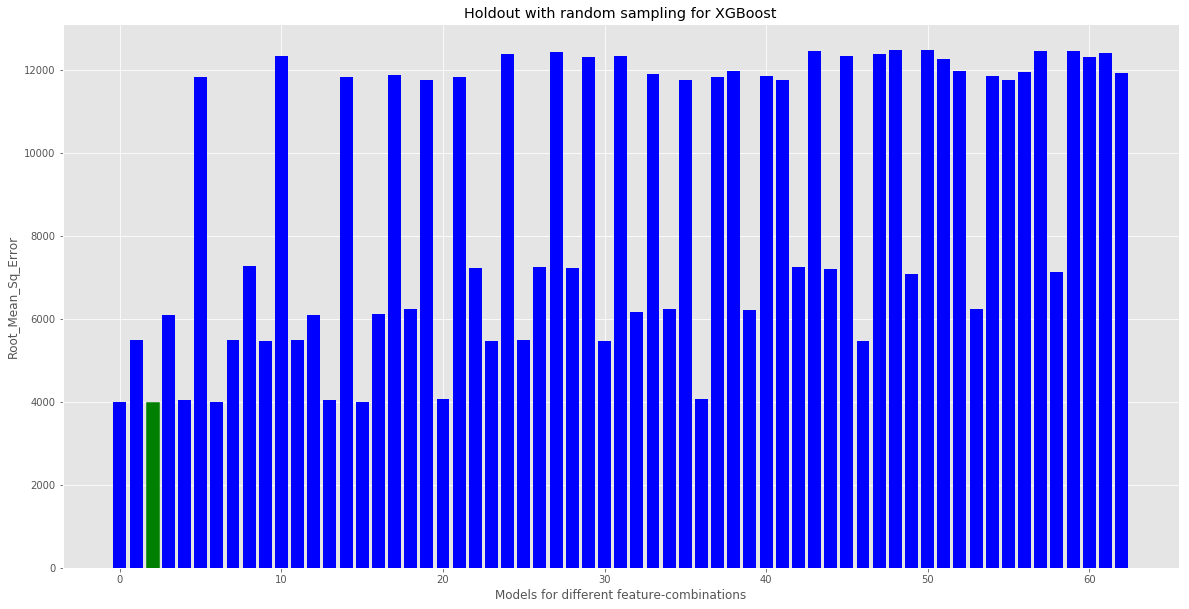

In [15]:

accuracy = store_holdout_xgb

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Holdout with random sampling for XGBoost')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
plt.savefig('Ass1_holdout_xgb.png')

plt.show()


In [12]:
store_holdout_r = []

In [13]:
#Holdout with random sampling for Linear Reg
for i in range(6):
     for item in possible_features_comb[i]:
            X = columns
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
                
            regr = linear_model.LinearRegression()
            X_train, X_test, train_y, val_y = train_test_split(X, y,test_size= .4,random_state = 0)
            regr.fit(X_train, train_y)
            preds_val = regr.predict(X_test)
            mae = math.sqrt(mean_squared_error(val_y, preds_val))
            store_holdout_r.append(mae)
            
print(store_holdout_r)       

[5732.492029608478, 6773.473115328144, 5731.642861022974, 6072.227480066341, 5748.7247708284185, 11677.585952597688, 5743.150835333905, 6776.26787650102, 7135.739546243443, 6781.704040070198, 12184.305478081258, 6766.00520159893, 6071.13228180418, 5747.6875105061545, 11692.060933120087, 5742.168637946051, 6087.863198083551, 11924.81639319695, 6071.787944808117, 11666.31274586027, 5761.117085806299, 11635.53503960723, 7135.924875611998, 6784.063983307672, 12194.635957749377, 6768.721407899131, 7140.980317820508, 12494.376529796999, 7126.4832412880905, 12165.620701094123, 6778.947554545884, 12118.941783035962, 6086.8414709140725, 11948.799082886653, 6070.663823463523, 11681.515585003683, 5759.968234650911, 11648.766521136613, 11914.565085286664, 6087.961199730723, 11881.320667520098, 11630.413015050211, 7141.052067495933, 12514.151261417515, 7126.670769507549, 12176.787581382003, 6781.238428702257, 12128.195643539744, 12476.024751764582, 7134.881329922002, 12432.617450065874, 12108.58162

5731.642861022974


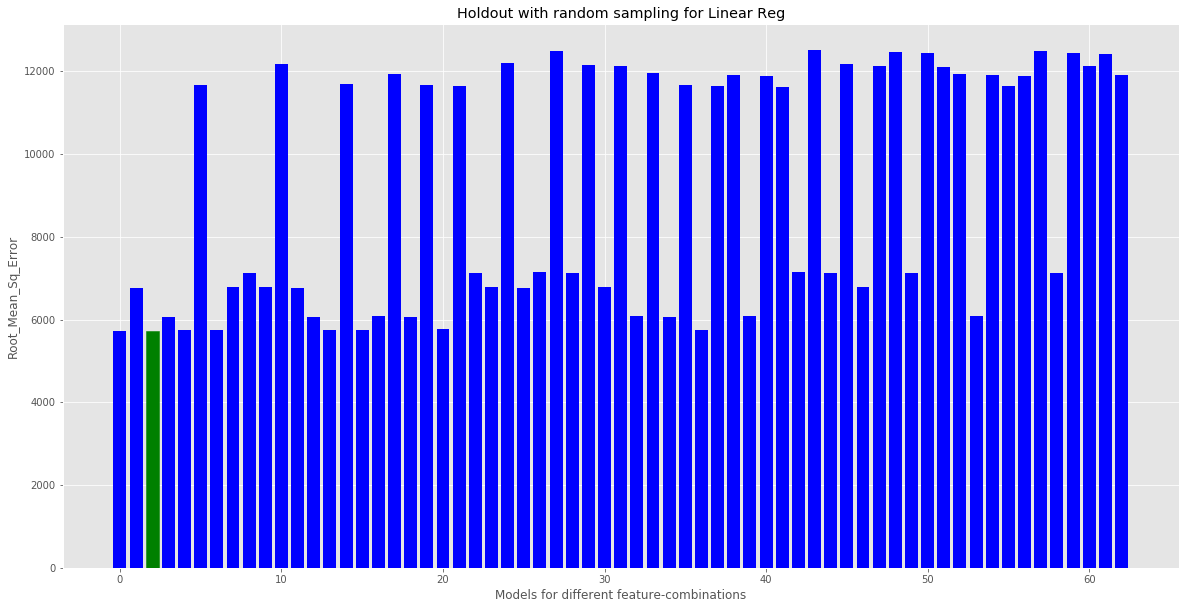

In [14]:

accuracy = store_holdout_r

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Holdout with random sampling for Linear Reg')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_holdout_lgr.png')
plt.show()


In [15]:
 store_holdout_rf = []

In [16]:
#Holdout with random sampling for Random Forest
for i in range(6):
     for item in possible_features_comb[i]:
            X = columns
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
                
            model_rf = RandomForestRegressor()
            X_train, X_test, train_y, val_y = train_test_split(X, y,test_size= .4,random_state = 0)
            model_rf.fit(X_train, train_y)
            preds_val = model_rf.predict(X_test)
            mae = math.sqrt(mean_squared_error(val_y, preds_val))
            store_holdout_rf.append(mae)
            
print(store_holdout_rf)       

[4879.768316773822, 6550.851990429572, 4688.863124283078, 7094.927311922498, 4917.481511205811, 12908.07990043299, 4811.1700592591005, 6841.977983911409, 7793.430550444924, 6543.112239442578, 13998.295756663514, 6633.9642799224985, 7082.5384338337035, 4974.865557736561, 13498.781190370108, 4972.2574616010415, 7346.453496290364, 13721.7115472664, 7212.144707572335, 12933.598511000631, 4781.058817058425, 12959.01092719483, 7437.439745866196, 6879.017640920331, 14001.88742157305, 6876.897186031387, 7337.53790223582, 12480.862394355738, 7262.49631201606, 14427.220217699243, 6954.958609415914, 14100.35944163287, 7063.195717834928, 13552.447896712949, 7399.357717666915, 13273.209454757116, 5003.300015709224, 12966.558910226348, 13778.403506526645, 6994.281669701026, 13307.859068583375, 13262.519427633739, 7251.928642537307, 12521.130803151333, 7198.23135491889, 14616.034774670623, 7043.829710261631, 14817.672066385567, 12452.941258578227, 7123.33399066394, 12530.879880692992, 14436.165903469

4688.863124283078


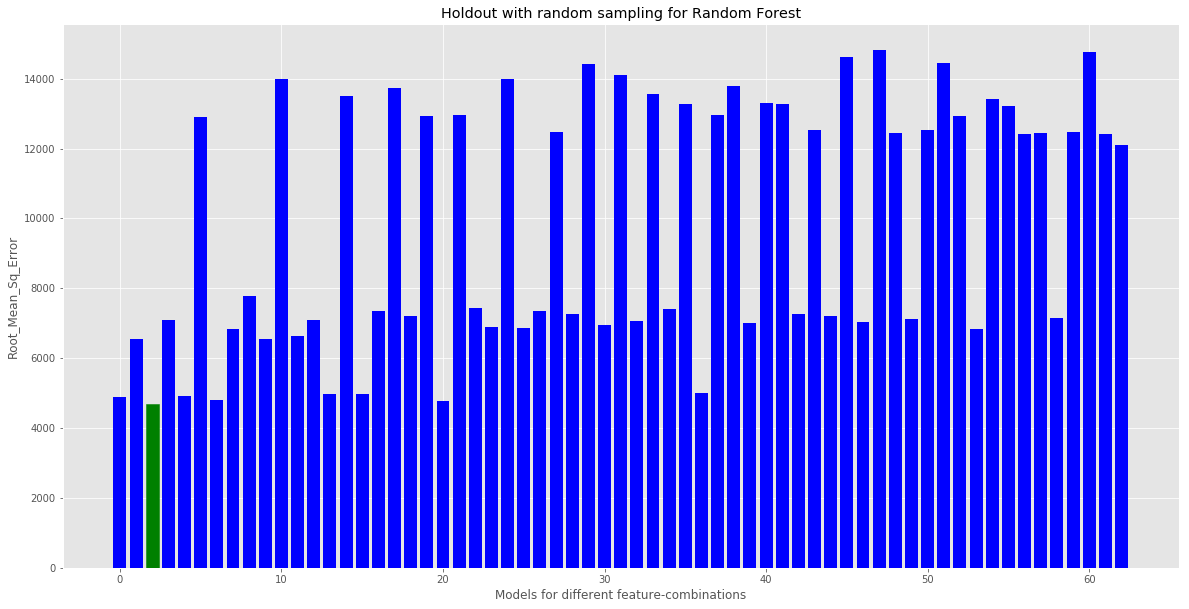

In [17]:

accuracy = store_holdout_rf

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Holdout with random sampling for Random Forest')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_holdout_rf.png')
plt.show()


In [18]:
store_strat_r = []

In [19]:
#Stratified Holdout for Linear reg
#Stratified with respect to ‘smoker’ field, since ‘charges’ do not have discrete values. 
X_train, X_test, train_y, val_y = train_test_split(columns, y,stratify=data['smoker'],random_state = 0)

for i in range(6):
     for item in possible_features_comb[i]:
            train_X = X_train
            test_X = X_test
            for j in range(i):
                train_X = train_X.drop([item[j]], axis = 1)
                test_X = test_X.drop([item[j]], axis = 1)
                
            
            regr = linear_model.LinearRegression()
            regr.fit(train_X, train_y)
            preds_val = regr.predict(test_X)
            mae = math.sqrt(mean_squared_error(val_y, preds_val))
            store_strat_r.append(mae)

print(store_strat_r)

[6330.682521082288, 7136.932717146387, 6330.35994279321, 6665.135742360012, 6365.736724543805, 11175.955221762708, 6355.220500006691, 7139.065789442613, 7629.70937153594, 7164.752153409865, 11631.311251651723, 7166.027534032056, 6654.7338160883755, 6364.8625745177105, 11194.298780447407, 6354.580501065379, 6698.075735396054, 11335.41708563045, 6665.321439114005, 11209.70305375845, 6388.612509578146, 11193.662909073555, 7629.8810035977285, 7166.7146230413755, 11652.791337344144, 7168.288454320622, 7655.786779585459, 11899.25505879829, 7629.501992735515, 11667.442716635069, 7191.63837481942, 11653.001627672553, 6686.909359246803, 11345.845376888088, 6654.973114038604, 11228.761125866211, 6387.404743965863, 11212.150891876601, 11368.80075917059, 6698.226624983654, 11331.990310246243, 11226.66547971803, 7655.528223134297, 11918.53780912531, 7629.6726714748875, 11689.72682920812, 7193.7404003824295, 11674.670188979351, 11935.2175684833, 7655.599553530333, 11895.499079622115, 11688.057251615

6330.35994279321


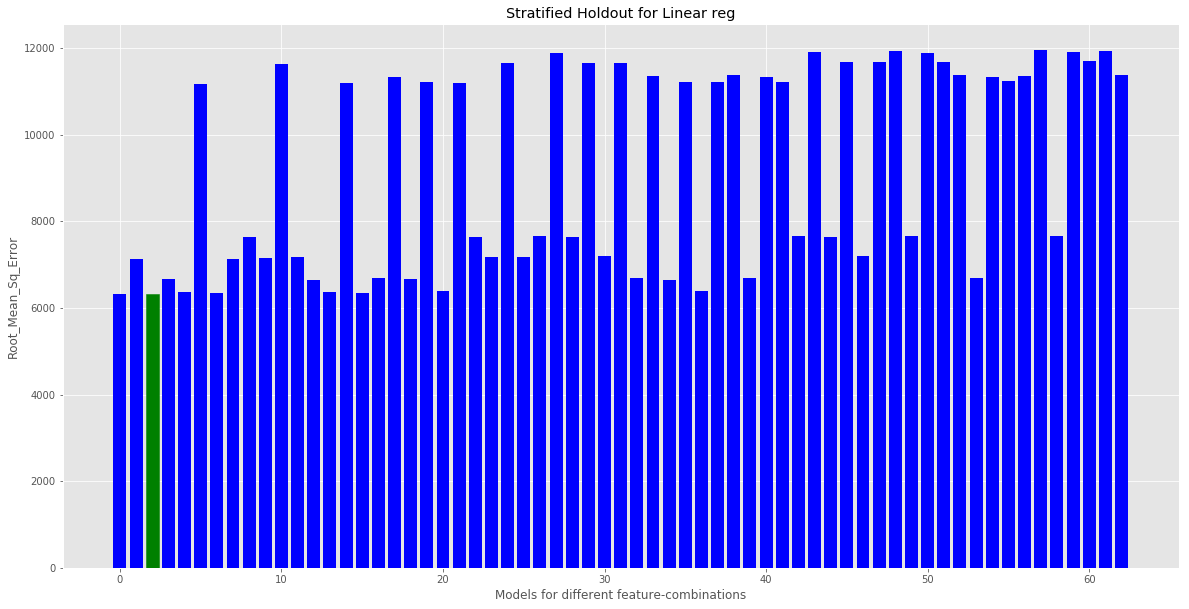

In [20]:

accuracy = store_strat_r

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified Holdout for Linear reg')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_St_lr.png')
plt.show()


In [21]:
store_strat_rf = []

In [22]:
#Stratified Holdout for Random Forest
#Stratified with respect to ‘smoker’ field, since ‘charges’ do not have discrete values. 
X_train, X_test, train_y, val_y = train_test_split(columns, y,stratify=data['smoker'],random_state = 0)


for i in range(6):
     for item in possible_features_comb[i]:
            train_X = X_train
            test_X = X_test
            for j in range(i):
                train_X = train_X.drop([item[j]], axis = 1)
                test_X = test_X.drop([item[j]], axis = 1)
                
            model_rf = RandomForestRegressor()
            
            model_rf.fit(train_X, train_y)
            preds_val = model_rf.predict(test_X)
            mae = math.sqrt(mean_squared_error(val_y, preds_val))
            store_strat_rf.append(mae)

print(store_strat_rf)

[5145.447473728505, 6842.193329700335, 4921.394124971617, 7590.106706082373, 5387.960417717551, 12400.33090937566, 5315.963197380605, 7174.822179841787, 8014.855566152898, 6628.823413861635, 13246.305761452068, 6823.9483246181735, 7443.4654255148, 5580.9969925809855, 12535.809126865368, 5106.823714581185, 8020.536470892026, 13115.161510202981, 8141.059175456109, 12502.669183505344, 5347.280838518045, 12893.373101142366, 7546.0259329428645, 7133.709060953125, 13879.775246318564, 7268.613033522996, 7709.085934978981, 11827.663575601588, 7693.978977629771, 13946.751493367938, 7108.627948320191, 13770.172314678804, 7727.169909767409, 12931.555131967674, 7870.269088911991, 13020.395301058292, 5487.108559751274, 12292.077870311317, 13926.36791194124, 7847.404613423332, 13290.153602889619, 12834.97859036435, 7620.230031023147, 11745.727342810293, 7691.2994666608665, 13709.259334716304, 6936.099215261863, 14009.620185909387, 11976.098365667043, 7667.660820567119, 11938.018315431542, 13798.1906

4921.394124971617


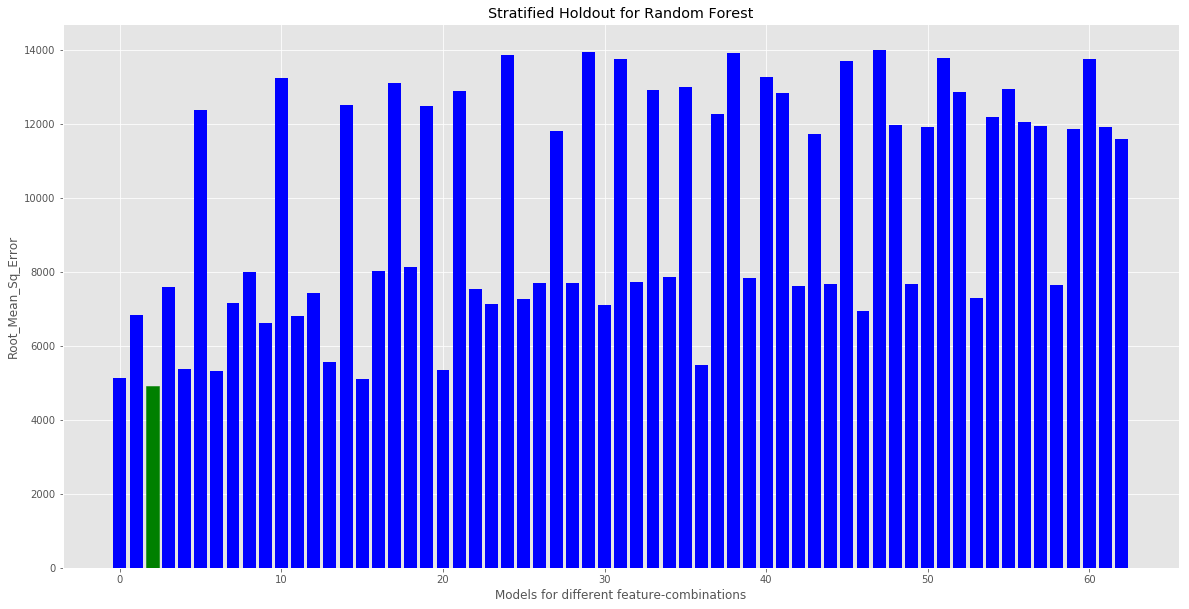

In [23]:

accuracy = store_strat_rf

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified Holdout for Random Forest')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_st_RF.png')
plt.show()


In [24]:
store_strat_xgb = []

In [25]:
#Stratified Holdout for XGBoost
#Stratified with respect to ‘smoker’ field, since ‘charges’ do not have discrete values. 
X_train, X_test, train_y, val_y = train_test_split(columns, y,stratify=data['smoker'],random_state = 0)


for i in range(6):
     for item in possible_features_comb[i]:
            train_X = X_train
            test_X = X_test
            for j in range(i):
                train_X = train_X.drop([item[j]], axis = 1)
                test_X = test_X.drop([item[j]], axis = 1)
                
            
            model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
            
            model_xgb.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, val_y)], verbose=False)
            preds_val = model_xgb.predict(test_X)
            mae = math.sqrt(mean_squared_error(val_y, preds_val))
            store_strat_xgb.append(mae)
            
print(store_strat_xgb)

[4603.70881816033, 5848.403034003239, 4607.407558767544, 6671.824761948364, 4710.670096534968, 11374.57093610864, 4646.89175425576, 5857.074740065189, 7536.340689387148, 5888.05567962727, 11793.49820742192, 5874.743619397967, 6643.8817357895405, 4713.083012295701, 11390.461028112139, 4647.022144899955, 6723.721761215016, 11352.58072287916, 6754.097783132361, 11435.350051419726, 4753.7897339057645, 11421.19310923891, 7473.781674481558, 5901.57318027128, 11835.835298964153, 5891.286503389565, 7577.795713851601, 11749.545472593096, 7563.063428463086, 11887.345012149646, 5916.713670192481, 11794.376514430536, 6677.172318821298, 11299.755719800749, 6704.366436342614, 11456.948189012523, 4755.72517162829, 11449.29911742026, 11380.023206568258, 6829.182324972362, 11385.159166247677, 11513.250573673185, 7567.290905712563, 11751.646620228237, 7536.593524918265, 11965.511150214408, 5928.538019012891, 11839.197337671372, 11911.716433385855, 7562.7077608247955, 11867.73831536142, 11880.89012297610

4603.70881816033


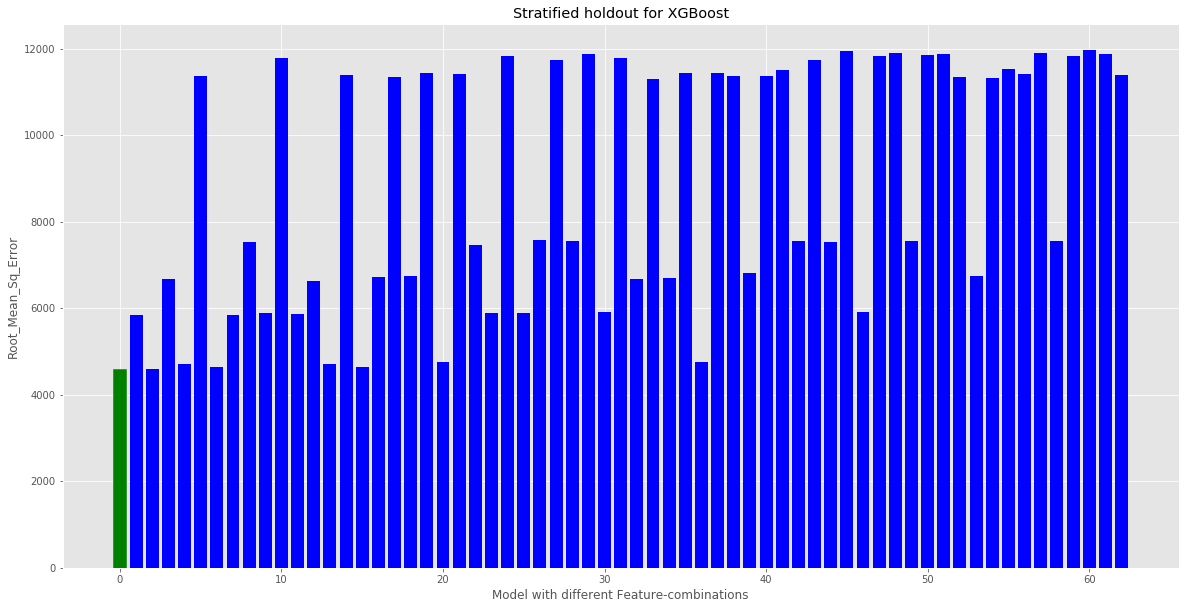

In [26]:

accuracy = store_strat_xgb

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified holdout for XGBoost')
plt.xlabel('Model with different Feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_st_XGB.png')
plt.show()


In [27]:
store_k_strat_r = []

In [28]:
#Stratified Kfold for Linear Reg

_y = data['smoker']
for i in range(6):
     for item in possible_features_comb[i]:
            X = columns
            kf = StratifiedKFold(n_splits=10)
            mae = np.empty(10)
            for k, (train, test) in enumerate(kf.split(data, _y)):
                
                for j in range(i):
                    X = X.drop([item[j]], axis = 1)
                
                x_temp = X.iloc[train]
                y_temp = y.iloc[train]
                
                x_test_temp = X.iloc[test]
                y_test_temp = y.iloc[test]
               
                regr = linear_model.LinearRegression()
                regr.fit(x_temp, y_temp)
                
                preds_val = regr.predict(x_test_temp)
                
                mae[k] = math.sqrt(mean_squared_error(y_test_temp, preds_val))
                X = columns
                
            store_k_strat_r.append(np.average(mae))
            
            
            
print(store_k_strat_r)     

[6054.912405377729, 7052.05622379752, 6049.650738469138, 6377.077256840674, 6077.727646900827, 11356.888125785115, 6061.23475450647, 7047.713345733573, 7453.799966419452, 7083.654933845099, 11833.419061126166, 7062.080704924153, 6369.936313997127, 6072.597762760013, 11364.720898849493, 6055.748205099695, 6398.4478663597865, 11533.432649925633, 6373.295282562218, 11369.25315340931, 6083.86025393068, 11355.579473924956, 7445.158194760993, 7079.378656147166, 11836.037369118405, 7057.556223279871, 7485.279827525223, 12075.751914392535, 7449.237959698783, 11854.963584893701, 7092.949024267424, 11833.967699172017, 6391.638393943417, 11546.677174532615, 6366.237764664365, 11377.889237247333, 6078.510045482984, 11363.178318433596, 11543.86425435878, 6394.671671332884, 11526.253059774366, 11367.465794982481, 7476.921168555164, 12082.631460691173, 7440.700455639812, 11858.242019406574, 7088.507404112694, 11836.208006788469, 12096.234881414548, 7480.332339831604, 12068.159283386627, 11854.7477394

6049.650738469138


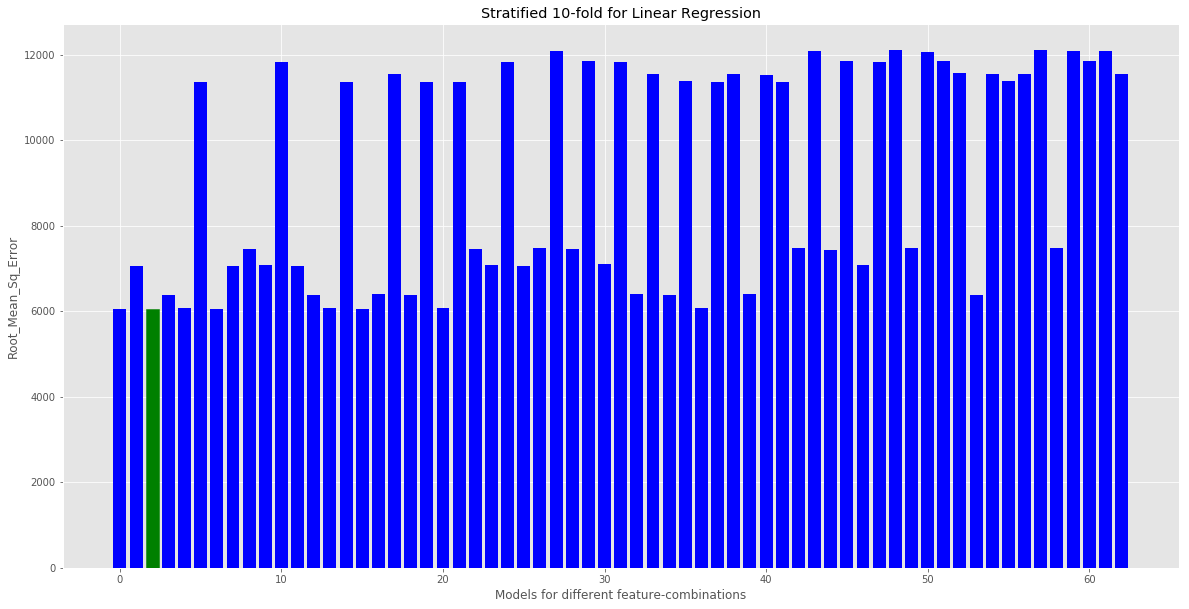

In [29]:

accuracy = store_k_strat_r

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified 10-fold for Linear Regression')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_kfold_lr.png')
plt.show()


In [30]:
store_k_strat_rf = []

In [31]:
#Stratified Kfold for R.F

_y = data['smoker']
for i in range(6):
     for item in possible_features_comb[i]:
            X = columns
            #Right now full data is being operated upon, uncoment the below line for splitting
            #X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state = 0)
            kf = StratifiedKFold(n_splits=10)
            mae = np.empty(10)
            for k, (train, test) in enumerate(kf.split(data, _y)):
                
                for j in range(i):
                    X = X.drop([item[j]], axis = 1)
                
                model_rf = RandomForestRegressor()
                x_temp = X.iloc[train]
                y_temp = y.iloc[train]
                
                x_test_temp = X.iloc[test]
                y_test_temp = y.iloc[test]
                
                model_rf.fit(x_temp, y_temp)
                
                preds_val = model_rf.predict(x_test_temp)
                
                mae[k] = math.sqrt(mean_squared_error(y_test_temp, preds_val))
                X = columns
                
            store_k_strat_rf.append(np.average(mae))
            
            
            
print(store_k_strat_rf)     

[5106.774694476366, 6707.326055981309, 4993.732763615157, 7237.642163287058, 5193.320399928394, 12717.357609000823, 5100.4587648594115, 6723.996284126757, 7632.770983646609, 6766.811276517292, 13817.958972399754, 6832.116619880701, 7105.032375217086, 5326.158844439281, 12777.232807941768, 5235.230338178979, 7644.0551108622585, 13060.958439509499, 7501.157663025627, 12772.642638190304, 5428.701815383024, 13020.241955676292, 7465.723467693388, 6838.531443331221, 14208.83223070148, 7018.116547715161, 7504.2954860029695, 12015.735756616585, 7559.808863424458, 14077.512186191354, 7036.922360849644, 13892.455821416777, 7154.718048204797, 13083.650553828962, 7351.246396230721, 13156.034578820789, 5472.511182547865, 12951.485839397792, 13525.829892415864, 7307.239587615315, 13058.24292361755, 13058.543913884405, 7465.408820302781, 12020.28312837918, 7463.975830634592, 14247.33601563537, 7003.163445944961, 14346.908857451335, 12102.260578291896, 7460.4389551478, 12077.54869079125, 14059.8981154

4993.732763615157


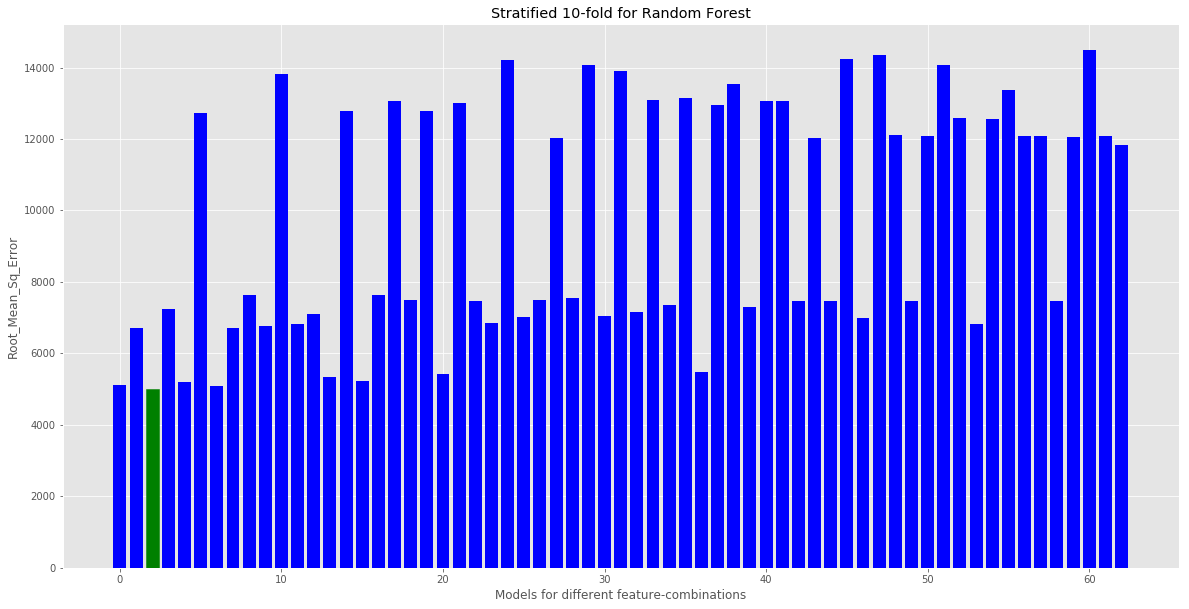

In [32]:

accuracy = store_k_strat_rf

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified 10-fold for Random Forest')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_kfoldrf.png')
plt.show()


In [33]:
store_k_strat_xgb = []

In [34]:
#Stratified Kfold for XGBoost

_y = data['smoker']
for i in range(6):
     for item in possible_features_comb[i]:
            X = columns
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
                
            
            kf = KFold(n_splits=10)
            mae = np.empty(10)
            X_train = X
            y_train = y
            for k, (train, test) in enumerate(kf.split(X_train, _y)):
                model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
                x_temp = X_train.iloc[train]
                y_temp = y_train.iloc[train]
                
                x_test_temp = X_train.iloc[test]
                y_test_temp = y_train.iloc[test]
                
                model_xgb.fit(x_temp, y_temp, early_stopping_rounds=5,eval_set=[(x_test_temp, y_test_temp)], verbose=False)
                
                preds_val = model_xgb.predict(x_test_temp)
                
                mae[k] = math.sqrt(mean_squared_error(y_test_temp, preds_val))
                
            store_k_strat_xgb.append(np.average(mae))
            
            
print(store_k_strat_xgb)            
         


                
            
            

[4429.613213928933, 5824.619901946171, 4428.863947761538, 6373.8217958651, 4494.135315904848, 11526.168149349649, 4444.348088996063, 5818.146510460861, 7392.052884014697, 5856.291700551128, 11994.511793709262, 5832.031010881605, 6362.83476056964, 4498.063272490487, 11545.532729465127, 4441.590904623312, 6422.860797731984, 11520.707432901867, 6442.400040815095, 11557.094149475179, 4504.713537151363, 11530.727815266813, 7365.124677050716, 5848.78528400286, 12001.304319077844, 5828.955876882033, 7446.7358719904705, 11979.468422983191, 7455.657102998764, 11987.16216110752, 5854.297169769893, 11994.378799740336, 6395.886297050779, 11543.564852501544, 6434.892112860522, 11568.893310887779, 4507.429077592939, 11542.193987780814, 11594.295247025551, 6472.668526894737, 11553.23320210585, 11572.147597215731, 7421.838495836915, 11977.499415022816, 7445.527034935944, 12032.875769006429, 5857.661078330193, 11998.260617175938, 12069.159129319227, 7432.351216515822, 12052.75249468115, 11973.974922765

4428.863947761538


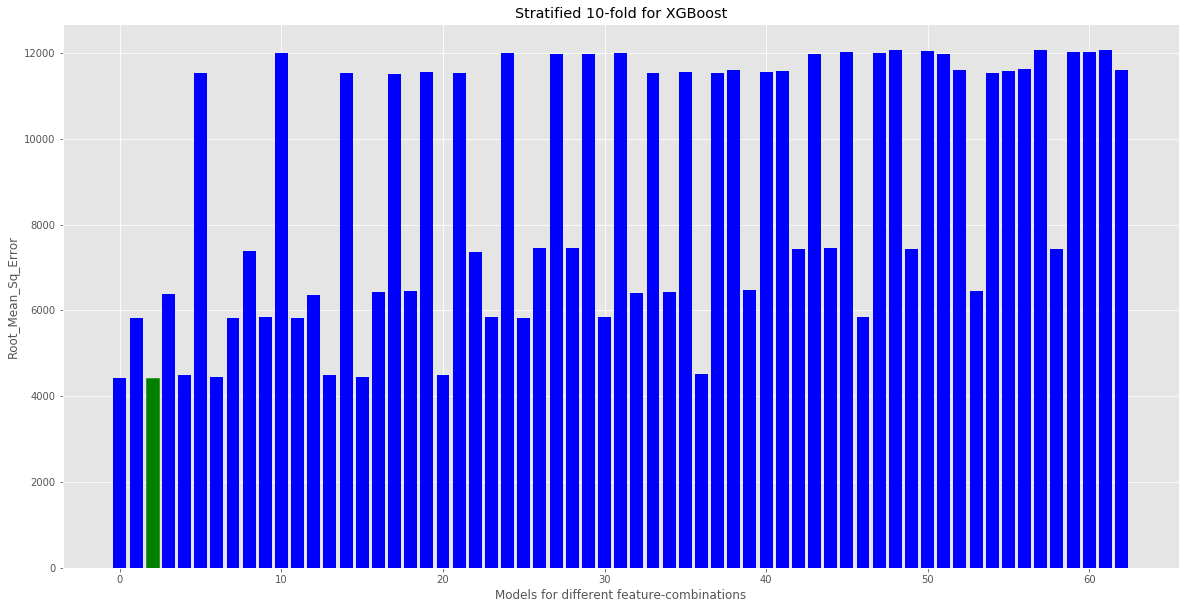

In [35]:

accuracy = store_k_strat_xgb

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified 10-fold for XGBoost')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_kfold_xgb.png')
plt.show()


In [36]:
store_boot_r = []

In [37]:
#Bootstrap for Linear Regression



dat =  np.zeros(1338)
for i in range (1338):
    dat[i] = i
    
        
        
for i in range(6):
     for item in possible_features_comb[i]:
            X = columns
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
            
            mae = np.empty(30)
            
            
            #Making 30 iterations 
            for j in range (30):
                
                # prepare bootstrap sample
                boot = resample(dat, replace=True, n_samples=1338, random_state=1)
                # out of bag observations
                oob = [x for x in dat if x not in boot]
                
                x_train_temp = X.iloc[boot]
                y_train_temp = y.iloc[boot]
                
                x_test_temp = X.iloc[oob]
                y_test_temp = y.iloc[oob]
                
                
                
                regr = linear_model.LinearRegression()
                regr.fit(x_train_temp, y_train_temp)
                
                preds_val = regr.predict(x_test_temp)
                
                mae[j] = math.sqrt(mean_squared_error(y_test_temp, preds_val))
                
            store_boot_r.append(np.average(mae))
    

            
                
print(store_boot_r)
            
            
         


                
            
            






[6141.377455237303, 7108.53207372495, 6139.90935459442, 6495.366160568079, 6168.314757717888, 11301.94902976223, 6164.479019987603, 7100.684049866541, 7511.718769348684, 7161.8598915260245, 11806.213347447112, 7123.991113359504, 6492.663380654532, 6166.657394308397, 11249.777951867036, 6163.032489400958, 6517.273499280977, 11536.016341701832, 6494.641179700095, 11321.014605901337, 6190.824021141857, 11306.17462378641, 7497.279326332198, 7153.9110447319135, 11728.359436476316, 7116.104536198665, 7565.229401323528, 12115.623979193118, 7512.350084418223, 11844.76593545215, 7176.710949007392, 11811.434639522828, 6514.357719747851, 11490.67971228626, 6491.873149925577, 11268.71258588081, 6189.19694498484, 11254.12908208278, 11554.503184644233, 6515.866830295407, 11533.667462681586, 11324.846800782823, 7550.8270014073605, 12040.34117621254, 7497.927936813376, 11768.14432843769, 7168.744713826084, 11733.729683794087, 12155.90966748508, 7565.729383659985, 12115.868684338293, 11849.721461127578

6139.90935459442


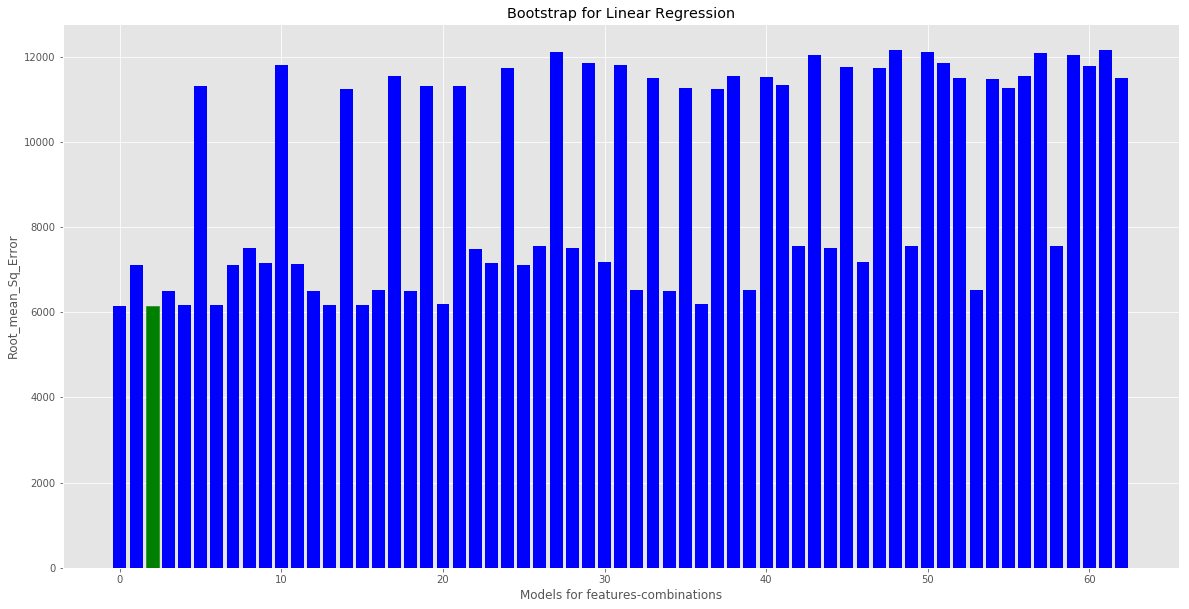

In [38]:

accuracy = store_boot_r

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Bootstrap for Linear Regression')
plt.xlabel('Models for features-combinations')
plt.ylabel('Root_mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_boots_reg.png')
plt.show()


In [39]:
store_boot_xgb = []

In [40]:
#Bootstrap for XGBoost

dat =  np.zeros(1338)
for i in range (1338):
    dat[i] = i
    
        
        
for i in range(6):
     for item in possible_features_comb[i]:
            X = columns
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
            
            mae = np.empty(30)
            # prepare bootstrap sample
            
            #Making 30 iterations
            for j in range (30):
                boot = resample(dat, replace=True, n_samples=1338, random_state=1)
                # out of bag observations
                oob = [x for x in dat if x not in boot]
                
                x_train_temp = X.iloc[boot]
                y_train_temp = y.iloc[boot]
                
                x_test_temp = X.iloc[oob]
                y_test_temp = y.iloc[oob]
                
                
                model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
                
                model_xgb.fit(x_train_temp, y_train_temp, early_stopping_rounds=5,eval_set=[(x_test_temp, y_test_temp)], verbose=False)
                
                preds_val = model_xgb.predict(x_test_temp)
                
                mae[j] = math.sqrt(mean_squared_error(y_test_temp, preds_val))
                
            store_boot_xgb.append(np.average(mae))
    

            
                
print(store_boot_xgb)
            
            
         


                
            
            






[4652.28188499269, 5965.482130604064, 4653.58237604079, 6667.381214970756, 4719.501750820686, 11495.044518604178, 4672.361814110332, 5967.4325814463045, 7552.783807101192, 6022.849024181478, 11842.165863582906, 5966.629768878924, 6665.379338291745, 4720.557867216233, 11442.304228306592, 4672.207842790964, 6662.254354096517, 11584.366843232672, 6741.425615906566, 11439.905549888286, 4724.816406866859, 11485.835006670568, 7498.0697153750725, 6025.149950745955, 11940.246913505789, 5973.94177639113, 7637.740115531987, 12065.392954667994, 7615.382797449295, 11848.983343212229, 6013.180323775771, 11843.433758927526, 6641.815448529964, 11463.938575879536, 6720.267352098299, 11412.014454257109, 4727.838775483538, 11446.273184435455, 11598.0786221649, 6683.547141388053, 11635.292700115588, 11481.93680092687, 7586.097821161838, 11994.7146743983, 7552.259776583388, 11908.709042728684, 6016.379695354458, 11962.379869198066, 12130.841860626671, 7553.0417949601915, 12141.528519402844, 11876.04874997

4652.28188499269


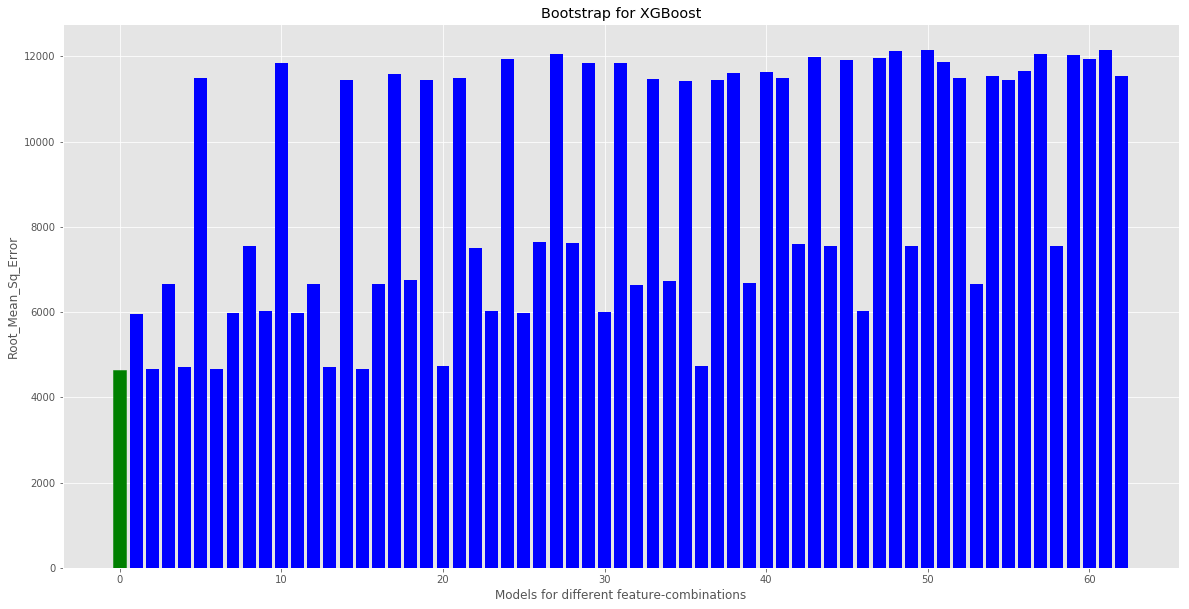

In [41]:

accuracy = store_boot_xgb

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Bootstrap for XGBoost')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_boot_XGB.png')
plt.show()


In [42]:
store_boot_rf = []

In [43]:
#Bootstrap for R.F.


dat =  np.zeros(1338)
for i in range (1338):
    dat[i] = i
    
        
        
for i in range(6):
     for item in possible_features_comb[i]:
            X = columns
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
            
            mae = np.empty(30)
            # prepare bootstrap sample
            
            #Making 30 iterations
            for j in range (30):
                boot = resample(dat, replace=True, n_samples=1338, random_state=1)
                # out of bag observations
                oob = [x for x in dat if x not in boot]
                
                x_train_temp = X.iloc[boot]
                y_train_temp = y.iloc[boot]
                
                x_test_temp = X.iloc[oob]
                y_test_temp = y.iloc[oob]
                
                
                model_rf = RandomForestRegressor()
                
                model_rf.fit(x_train_temp, y_train_temp)
                
                preds_val = model_rf.predict(x_test_temp)
                
                mae[j] = math.sqrt(mean_squared_error(y_test_temp, preds_val))
                
            store_boot_rf.append(np.average(mae))
    

            
                
print(store_boot_rf)   
            
            
         


                
            
            






[5581.830113826578, 6925.113681409123, 5575.599236909695, 7863.256068757116, 5509.148152792898, 12692.681031167887, 5766.867785607861, 6968.398347795847, 7973.549206725759, 7034.715552511642, 13337.369129174514, 7028.530286484323, 7786.403958680731, 5528.880464891498, 12894.389691693306, 5868.858978655923, 8005.236359034712, 13834.300129772608, 8002.930277170029, 12768.243758810313, 5771.2144666530485, 12849.9766261179, 7626.063739186111, 7144.803962006209, 13927.331692192034, 7185.75731831139, 7753.235510005666, 12202.237040297065, 7834.624111478164, 13668.80977767842, 7132.386873011971, 13675.890905189864, 7689.959046131161, 14087.851094433989, 7661.682298244696, 12865.59000418743, 5847.553501472764, 12937.246210233325, 14281.845313989063, 7635.595467553698, 13316.481381391792, 13215.272156363684, 7604.022100294019, 12166.85695291314, 7558.467052818657, 14429.641439508434, 7302.997819121439, 14049.774428627024, 12152.732134728956, 7556.4766381321615, 12159.717355687753, 14207.3025201

5509.148152792898


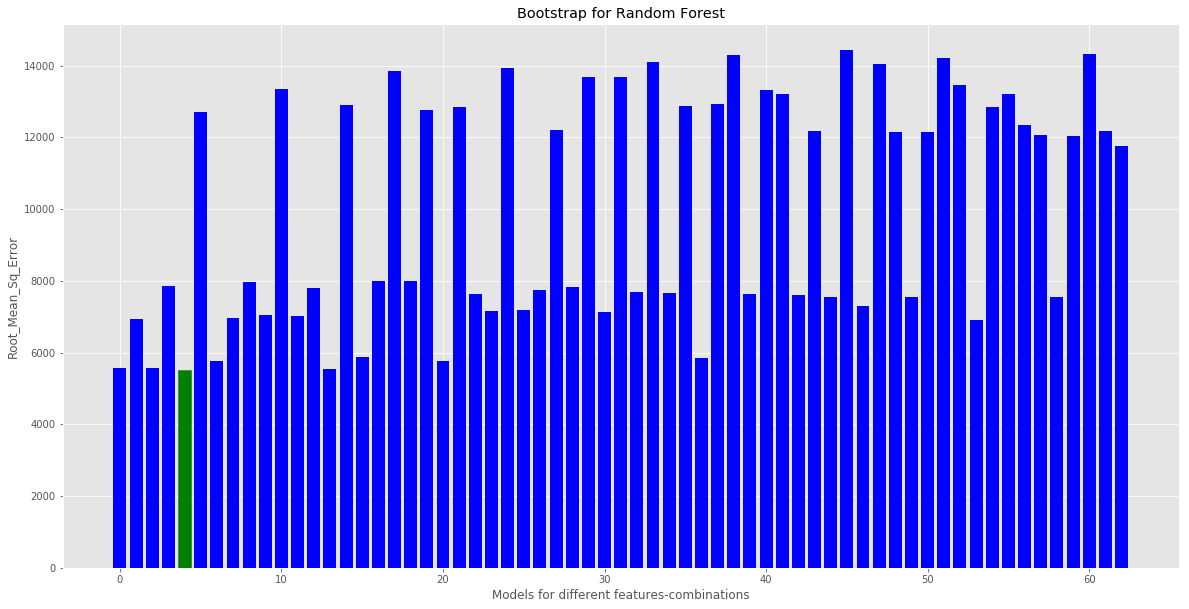

In [44]:

accuracy = store_boot_rf

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Bootstrap for Random Forest')
plt.xlabel('Models for different features-combinations')
plt.ylabel('Root_Mean_Sq_Error')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass1_boots_rf.png')
plt.show()


In [8]:
final_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
preff = data[['age',  'bmi','children', 'smoker', 'region']]
X_train, X_test, train_y, val_y = train_test_split(preff, y,test_size= .4,random_state = 0)
final_model.fit(X_train, train_y, early_stopping_rounds=5,eval_set=[(X_test, val_y)], verbose=False)
filename = "XGB_holdout.sav"
preds_val = final_model.predict(X_test)
# pickle.dump(final_model, open(filename, 'wb'))
